<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Pablo Muñoz Cuevas
              
  Romina Gutiérrez Cortés

**Fecha:** 05 de octubre del 2020.

**Expedientes** : if719963
                  
   If:713415
    
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 4a: Clase 9,10,11

## EJERCICIO 1

> Descripción de la tarea

>### <font color ='red'> **Tarea 4** 
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).

Genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 100 muestras generadas con el método y compárela con el función $f(x)$ dada, esto con el fín de validar que el procedimiento fue realizado de manera correcta

In [18]:
# Código de solución Pablo Muñoz problema 1.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy import optimize

In [19]:
def dfun(f, F_inv, N):
    #N:cantidad de terminos 
    #f:funcion de densidad de probabilidad 
    #Func inversa: x  despejada 
    u=np.random.uniform(0,1,N)
    f_rand=F_inv(u)
    x=np.arange(0,1,.01)
    f_densidad=f(x)
    plt.hist(f_rand,density=True, bins=30)
    plt.plot(x,f_densidad)
    plt.show()

<ipython-input-20-aa7089f0c964>:2: RuntimeWarning: divide by zero encountered in true_divide
  f= lambda x: 1/((np.sqrt(1-x))*np.sqrt(x)*np.pi)


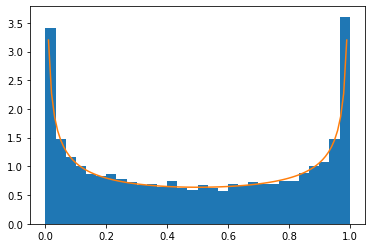

In [20]:
N= 10000
f= lambda x: 1/((np.sqrt(1-x))*np.sqrt(x)*np.pi)
F_inv= lambda u: (np.sin(u*np.pi/2))**2
dfun(f,F_inv,N)

In [23]:
# Código de solución Pablo Muñoz ejercico 2.
#Genero la funcion para la distribución discreta
def Gen_distr_discreta(X:'vector de números aleatorios',
                       prob_ac: 'Prob.Acumulada de la distribución a generar'):
    '''Tener en cuenta que este arreglo cuenta números empezando del 0'''
    v = np.array(list(map(lambda j:sum(1 for i in prob_ac if i<X[j]),range(N))))
    return v

In [24]:
def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion)),density = densidad) 
    plt.bar(x[1:],y,label=label)
#     print(len(y),len(x))
    plt.legend()
    plt.show()

In [ ]:
# Función que calcula la probabilidad acumulada optimizada
def Prob_ac_binomial(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

# E2
## Enunciado de tarea (Transcibirlo)
>### <font color ='red'> Ejemplo 3  **Tarea** 
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>
Genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique en una gráfica el historias 100 muestras generadas y comparela con el función F(x) dada, esto con el fín de validar que el procedimiento fue realizado de manera correcta
### Despejando x

$$x=\sin^{2}(\frac{\mu\pi}{2})$$


### Deerivada de x

$$\frac{d}{dx}F(x) = \frac{1}{x \sqrt {-(x-1)x}}$$


In [2]:
#E2
import numpy as np
import matplotlib.pyplot as plt
def D_erlang(N):
    f = np.random.uniform(0.03,0.97,N)  
    y =list(map(lambda i:(np.sin((f[i]*np.pi)/2))**2 ,range(N)))
    return y

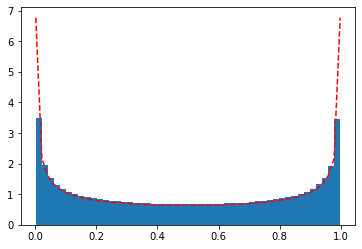

In [3]:
N=10**6
def plot_hist(N):
    r1=D_erlang(N)
    y,x,_=plt.hist(r1,bins=50,density=True)
    y2 = (1/np.pi)*(1/(np.sqrt(1-x)*np.sqrt(x)))
    plt.plot(x,y2,'r--')
    plt.show()
    
plot_hist(N) 

2. La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.

Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que
$$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$

>Primero añadimos el 1

>$$p_{i+1}=\frac{n!}{{i+1}!(n-i-1)!}p^{i+1}(1-p)^{n-i-1},\quad i=0,1,\cdots,n$$

>Sustituyendo $P_i$ en $P_{i+1}$

>$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p}*[\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i}]$$

>Simplificando

>$$p_{i+1}=\frac{n!}{{i+1}!(n-i-1)!}p^{i+1}(1-p)^{n-i-1}$$


### Ejercicio 2: 
Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

In [ ]:
# Código de solución 
.
.
.
.


In [ ]:
# Código de solución 
.
.
.
.


# Tarea 
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
![imagen.png](attachment:imagen.png)

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
![imagen.png](attachment:imagen.png)

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir
7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo


In [ ]:
# Código de solución 
.
.
.
.


In [ ]:
# Código de solución 
.
.
.
.
